In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [77]:
# Carregar o conjunto de dados
df = pd.read_csv('../data/commerce_dataset_clean.csv', sep=';')

In [78]:
# Converter a coluna 'dtme' para datetime e definir como índice do DataFrame
df['dtme'] = pd.to_datetime(df['dtme'])
df.set_index('dtme', inplace=True)

## ARIMA

In [79]:
# Agregando as vendas diárias
daily_sales = df.groupby('dtme')['total'].sum()

# Separando os dados em 20% para treinamento e 80% para teste
train_size = int(len(daily_sales) * 0.2)
train, test = daily_sales[0:train_size], daily_sales[train_size:len(daily_sales)]

In [80]:
# Construindo o modelo ARIMA com os dados de treinamento
# Os parâmetros do modelo (p,d,q) precisam ser escolhidos. Vamos começar com uma configuração simples (1,1,1).
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -136.942
Date:                Tue, 27 Feb 2024   AIC                            279.883
Time:                        18:06:00   BIC                            282.201
Sample:                    01-01-2019   HQIC                           280.002
                         - 01-17-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2355      0.393     -0.600      0.549      -1.005       0.534
ma.L1         -0.7061      0.355     -1.989      0.047      -1.402      -0.010
sigma2      1.577e+06   7.26e+05      2.174      0.0

/Users/kiwi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/kiwi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/kiwi/.pyenv/versions/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [81]:
# Previsões
predictions = model_fit.forecast(steps=len(test))

print(predictions.head())

2019-01-18    4182.124078
2019-01-19    3937.353155
2019-01-20    3994.996591
2019-01-21    3981.421589
2019-01-22    3984.618496
Freq: D, Name: predicted_mean, dtype: float64


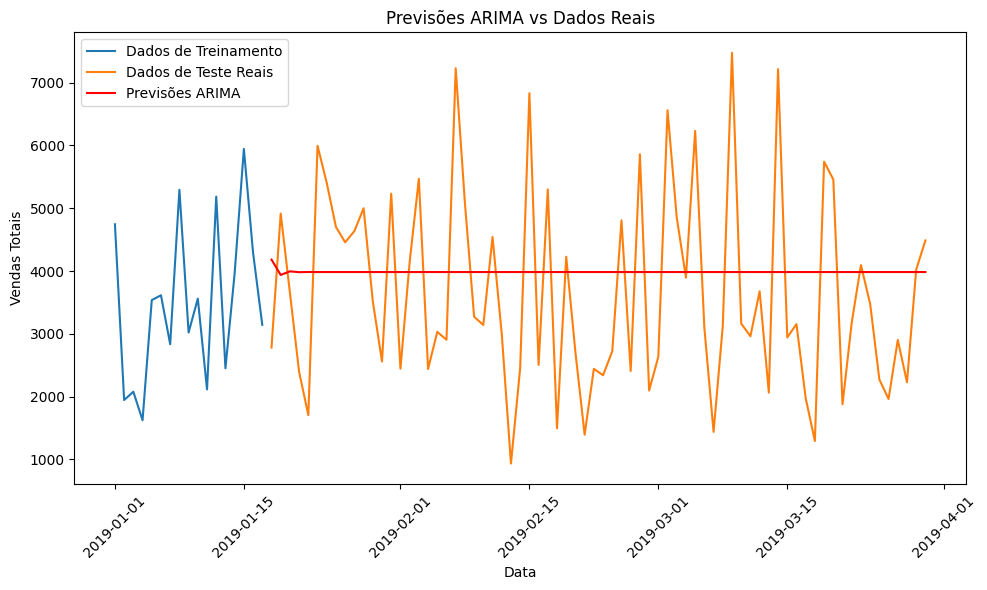

In [82]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Dados de Treinamento')
plt.plot(test.index, test, label='Dados de Teste Reais')
plt.plot(test.index, predictions, label='Previsões ARIMA', color='red')
plt.legend()
plt.title('Previsões ARIMA vs Dados Reais')
plt.ylabel('Vendas Totais')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()